In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
akk_pf = pd.read_csv("./../data/210503_pf.csv")
akk_pf

ticker                   company_name  qty  avg_cost_price  \
0  ARVINDFASN.NS        ARVIND FASHIONS LIMITED    2          339.33   
1         BEL.NS         BHARAT ELECTRONICS LTD   40          103.69   
2  HINDUNILVR.NS     HINDUSTAN UNILEVER LIMITED    5         2150.78   
3        IDEA.NS          VODAFONE IDEA LIMITED  500            3.28   
4         ITC.NS                    ITC LIMITED   14          214.42   
5        NBCC.NS           NBCC (INDIA) LIMITED   50           17.76   
6        NTPC.NS                   NTPC LIMITED   21          114.05   
7        SAIL.NS   STEEL AUTHORITY OF INDIA LTD   50           29.72   
8   SUNPHARMA.NS  SUN PHARMACEUTICAL INDUSTRIES   10          581.70   

   val_at_cost  
0       678.66  
1      4147.60  
2     10753.90  
3      1640.00  
4      3001.88  
5       888.00  
6      2395.05  
7      1486.00  
8      5817.00

In [3]:
total_investment = np.sum(akk_pf.val_at_cost)
total_investment

30808.09

In [4]:
akk_pf['wt'] = akk_pf.val_at_cost / total_investment
akk_pf


ticker                   company_name  qty  avg_cost_price  \
0  ARVINDFASN.NS        ARVIND FASHIONS LIMITED    2          339.33   
1         BEL.NS         BHARAT ELECTRONICS LTD   40          103.69   
2  HINDUNILVR.NS     HINDUSTAN UNILEVER LIMITED    5         2150.78   
3        IDEA.NS          VODAFONE IDEA LIMITED  500            3.28   
4         ITC.NS                    ITC LIMITED   14          214.42   
5        NBCC.NS           NBCC (INDIA) LIMITED   50           17.76   
6        NTPC.NS                   NTPC LIMITED   21          114.05   
7        SAIL.NS   STEEL AUTHORITY OF INDIA LTD   50           29.72   
8   SUNPHARMA.NS  SUN PHARMACEUTICAL INDUSTRIES   10          581.70   

   val_at_cost        wt  
0       678.66  0.022029  
1      4147.60  0.134627  
2     10753.90  0.349061  
3      1640.00  0.053233  
4      3001.88  0.097438  
5       888.00  0.028824  
6      2395.05  0.077741  
7      1486.00  0.048234  
8      5817.00  0.188814

In [5]:
# sanity check
akk_pf.wt.sum()


1.0

In [6]:
tickers = akk_pf.ticker.tolist()
col_names = tickers
tickers.append("%5ENSEI")  # Nifty
tickers


['ARVINDFASN.NS',
 'BEL.NS',
 'HINDUNILVR.NS',
 'IDEA.NS',
 'ITC.NS',
 'NBCC.NS',
 'NTPC.NS',
 'SAIL.NS',
 'SUNPHARMA.NS',
 '%5ENSEI']

In [7]:
# get data for 2years
pf = yf.download(tickers, period='2y')['Adj Close']

# drop NA
pf.dropna(inplace=True)
pf.info()


[*********************100%***********************]  10 of 10 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2019-05-27 to 2021-05-25
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   %5ENSEI        491 non-null    float64
 1   ARVINDFASN.NS  491 non-null    float64
 2   BEL.NS         491 non-null    float64
 3   HINDUNILVR.NS  491 non-null    float64
 4   IDEA.NS        491 non-null    float64
 5   ITC.NS         491 non-null    float64
 6   NBCC.NS        491 non-null    float64
 7   NTPC.NS        491 non-null    float64
 8   SAIL.NS        491 non-null    float64
 9   SUNPHARMA.NS   491 non-null    float64
dtypes: float64(10)
memory usage: 42.2 KB


In [8]:
# make colnames readable
col_names = [x[:-3] if x[-3:] == '.NS' else 'NIFTY' for x in tickers ]
pf.columns = col_names
pf.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2019-05-27 to 2021-05-25
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ARVINDFASN  491 non-null    float64
 1   BEL         491 non-null    float64
 2   HINDUNILVR  491 non-null    float64
 3   IDEA        491 non-null    float64
 4   ITC         491 non-null    float64
 5   NBCC        491 non-null    float64
 6   NTPC        491 non-null    float64
 7   SAIL        491 non-null    float64
 8   SUNPHARMA   491 non-null    float64
 9   NIFTY       491 non-null    float64
dtypes: float64(10)
memory usage: 42.2 KB


In [9]:
# percent returns
pf_perc_rets = pf.pct_change()
pf_perc_rets


ARVINDFASN       BEL  HINDUNILVR      IDEA       ITC      NBCC  \
Date                                                                         
2019-05-27         NaN       NaN         NaN       NaN       NaN       NaN   
2019-05-28    0.000335  0.024507   -0.002212  0.002793  0.045977 -0.006705   
2019-05-29   -0.005671 -0.048845   -0.004878  0.002223 -0.032967 -0.002769   
2019-05-30    0.007149  0.005713    0.010695  0.001909  0.007576  0.001909   
2019-05-31   -0.001934 -0.010990   -0.015432  0.002382  0.048872 -0.034990   
...                ...       ...         ...       ...       ...       ...   
2021-05-19   -0.005159  0.003186    0.003557 -0.006107 -0.011696 -0.010950   
2021-05-20   -0.008257 -0.011291    0.010635 -0.006611 -0.005917 -0.003610   
2021-05-21    0.018063  0.001428    0.005102  0.007721  0.017857  0.009903   
2021-05-24    0.001476  0.001425   -0.004759 -0.010879  0.005848  0.011720   
2021-05-25    0.000707  0.026334   -0.048773  0.003210 -0.005814 -0.002837   

                NTPC      SAIL  SUNPHARMA     NIFTY  
Date                                                 
2019-05-27       NaN       NaN        NaN       NaN  
2019-05-28  0.016548 -0.004504  -0.006530 -0.005062  
2019-05-29 -0.028682 -0.012821  -0.035681  0.026772  
2019-05-30  0.016760  0.032086  -0.015579 -0.026074  
2019-05-31 -0.028258 -0.013693  -0.007913 -0.007026  
...              ...       ...        ...       ...  
2021-05-19  0.014170 -0.001338  -0.025388  0.018240  
2021-05-20 -0.013972 -0.001786  -0.055599 -0.023529  
2021-05-21 -0.004049  0.009843   0.004529  0.005169  
2021-05-24 -0.005081  0.000443   0.022541  0.000797  
2021-05-25 -0.013279  0.003543  -0.006413  0.007453  

[491 rows x 10 columns]

In [10]:
pf_cum_rets = (1 + pf_perc_rets).cumprod()
pf_cum_rets


ARVINDFASN       BEL  HINDUNILVR      IDEA       ITC      NBCC  \
Date                                                                         
2019-05-27         NaN       NaN         NaN       NaN       NaN       NaN   
2019-05-28    1.000335  1.024507    0.997788  1.002793  1.045977  0.993295   
2019-05-29    0.994662  0.974465    0.992920  1.005023  1.011494  0.990545   
2019-05-30    1.001774  0.980031    1.003540  1.006942  1.019157  0.992436   
2019-05-31    0.999836  0.969261    0.988053  1.009340  1.068965  0.957710   
...                ...       ...         ...       ...       ...       ...   
2021-05-19    1.260416  0.171487    1.469689  1.372154  0.647510  0.768814   
2021-05-20    1.250009  0.169551    1.485319  1.363082  0.643678  0.766038   
2021-05-21    1.272589  0.169793    1.492897  1.373607  0.655172  0.773625   
2021-05-24    1.274467  0.170035    1.485792  1.358663  0.659004  0.782691   
2021-05-25    1.275368  0.174513    1.413326  1.363024  0.655172  0.780471   

                NTPC      SAIL  SUNPHARMA     NIFTY  
Date                                                 
2019-05-27       NaN       NaN        NaN       NaN  
2019-05-28  1.016548  0.995496   0.993470  0.994938  
2019-05-29  0.987392  0.982733   0.958022  1.021574  
2019-05-30  1.003940  1.014264   0.943097  0.994938  
2019-05-31  0.975571  1.000375   0.935634  0.987947  
...              ...       ...        ...       ...  
2021-05-19  0.807686  0.944816   2.476458  1.737219  
2021-05-20  0.796401  0.943128   2.338769  1.696344  
2021-05-21  0.793177  0.952412   2.349361  1.705112  
2021-05-24  0.789146  0.952834   2.402318  1.706470  
2021-05-25  0.778667  0.956210   2.386912  1.719190  

[491 rows x 10 columns]

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
for col in col_names:
    ax.plot(pf_cum_rets.index, pf_cum_rets[col], label=col)
ax.legend()
ax.grid('y')
plt.show()


In [12]:
# weighted return
weights = akk_pf.wt.tolist()
wt_rets = weights * pf_perc_rets.iloc[:,:-1]
pf_rets = wt_rets.sum(axis=1)
pf_rets_cum = (1 + pf_rets[1:]).cumprod()  # cumulative rets
nifty_rets = pf_perc_rets.iloc[:, -1]
nifty_rets_cum = (1 + nifty_rets[1:]).cumprod()  # cumulative rets


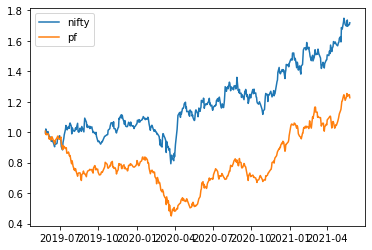

In [13]:
fig, ax = plt.subplots()
ax.plot(nifty_rets_cum.index, nifty_rets_cum, label='nifty')
ax.plot(pf_rets_cum.index, pf_rets_cum, label='pf')
ax.legend()
plt.show()


In [14]:
# Portfolio returns
mean_pf_rets = pf_perc_rets.iloc[:, :-1].mean()
mean_pf_rets
port_rets = np.sum(mean_pf_rets * weights)
print(f"Portfolio return: {port_rets * 100:.2f}")


Portfolio return: 0.07


In [15]:
# measuring risk of a portfolio
pf_rets = pf.iloc[:, :-1].pct_change()
pf_rets.head()

# covariance matrix for the daily returns data
cov_matrix_d = pf_rets.cov()
# annualized it
cov_mat_ann = cov_matrix_d * 250
cov_mat_ann


ARVINDFASN       BEL  HINDUNILVR      IDEA       ITC      NBCC  \
ARVINDFASN    0.063705  0.055138    0.059953  0.038435  0.064862  0.043741   
BEL           0.055138  0.292771    0.076587  0.026127  0.101561  0.042355   
HINDUNILVR    0.059953  0.076587    0.215832  0.028432  0.079379  0.056078   
IDEA          0.038435  0.026127    0.028432  0.082736  0.019984  0.025074   
ITC           0.064862  0.101561    0.079379  0.019984  1.209854  0.051885   
NBCC          0.043741  0.042355    0.056078  0.025074  0.051885  0.107528   
NTPC          0.070997  0.110411    0.118588  0.034965  0.155169  0.057245   
SAIL          0.042573  0.053347    0.060864  0.019573  0.079334  0.035935   
SUNPHARMA     0.087827  0.085666    0.117189  0.041602  0.150201  0.073897   

                NTPC      SAIL  SUNPHARMA  
ARVINDFASN  0.070997  0.042573   0.087827  
BEL         0.110411  0.053347   0.085666  
HINDUNILVR  0.118588  0.060864   0.117189  
IDEA        0.034965  0.019573   0.041602  
ITC         0.155169  0.079334   0.150201  
NBCC        0.057245  0.035935   0.073897  
NTPC        0.340101  0.079988   0.164716  
SAIL        0.079988  0.105180   0.083892  
SUNPHARMA   0.164716  0.083892   0.339375

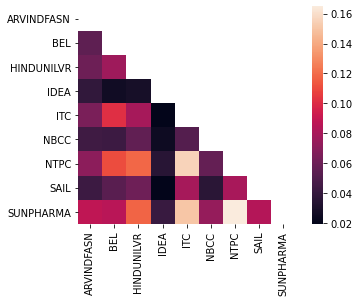

In [16]:
# plot covariance
mask = np.zeros_like(cov_mat_ann)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cov_mat_ann, mask=mask, square=True)
plt.show()


In [17]:
# calculate the variance
pf_variance = np.dot(np.array(weights).T, np.dot(cov_mat_ann, weights))
print(f"Portfolio varaiance: {pf_variance * 100:.2f}% ")


Portfolio varaiance: 12.86% 


In [18]:
pf_std = np.sqrt(pf_variance)
print(f"Portfolio std: {pf_std * 100:.2f}%")

Portfolio std: 35.86%


## Annualized returns

$rate = ( 1 + Return)^{\frac{1}{N}} - 1$

where N in years

In [19]:
# Hindustan Unilever
hul = pf.loc['2021-01-24':, 'HINDUNILVR']
hul

Date
2021-01-25    127.979042
2021-01-27    129.937408
2021-01-28    128.468643
2021-01-29    127.342575
2021-02-01    130.916595
                 ...    
2021-05-19    155.149994
2021-05-20    156.800003
2021-05-21    157.600006
2021-05-24    156.850006
2021-05-25    149.199997
Name: HINDUNILVR, Length: 80, dtype: float64

In [20]:
# total return in 4 months
total_return = (hul[-1] - hul[0]) / hul[0]
total_return

0.1658158598045637

In [21]:
annualized_rets_hul = ((1 + total_return) **(12/4)) -1
annualized_rets_hul

0.5844913678799422

## Risk adjusted returns

A risk-adjusted return is a calculation of the profit or potential profit from an investment that takes into account the degree of risk that must be accepted in order to achieve it. The risk is measured in comparison to that of a virtually risk-free investment

### Sharpe ratio
The Sharpe ratio measures the profit of an investment that _exceeds the risk-free rate, per unit of standard deviation_. It is calculated by taking the return of the investment, subtracting the risk-free rate, and dividing this result by the investment's standard deviation.

$\textrm{Sharpe ratio} = \frac{R_p - R_f}{\sigma_p}$

where:<br>
    $R_p$ is the portfolio return,<br>
    $R_f$ is the risk free rate, and<br>
    $\sigma_p$ is the portfolio standard deviation<br>

remember

$\sigma_p = \sqrt{\textrm{Weights transposed}(\textrm{Covariance matrix} * \textrm{weights})}$
    

#### Annualizing volatility
* Annualized standard deviation is calculated as folows: $\sigma_a = \sigma_m * \sqrt{T}$
* $\sigma_m$ is the measured standard deviation
* $\sigma_a$ is the annualized standard deviation
* `T` is the number of data points per year (normally 252).
* Alternatively, when using varaince isntead of standard deviation; $\sigma^{2}_{a} = \sigma^{2}_{m} * T$

In [22]:
risk_free = 0.04

In [23]:
rets = np.log(pf['NBCC'] / pf['NBCC'].shift(1))
volatility = rets.std() * np.sqrt(252)
sr = (rets.mean() - risk_free) / volatility
sr

-0.12211641718697847

## Non-normal distribution of returns

### Skewness
* `skewness < -1` or `skewness > 1` -> **highly skewed distribution**
* `-1 < skewness < -0.5` or `0.5 < skewness < 1` -> **Moderately skewed distribution**
* `-0.5 < skewness < 0.5` -> **Approximately symmetric distribution**

### Interpreting kurtosis
* A normal distibution has kurtosis of exactly 3 and is called (**mesokurtic**)
* A distiburion wiht kurtosis < 3 is called **platykurtic**. Tails are shorter and thinner, and central peak is lower and broader.
* A sidtribution with kurtosis > 3 is called **leptokurtic**: Tails are longer and fatter, and central peak is higher and sharper (fat tailed).

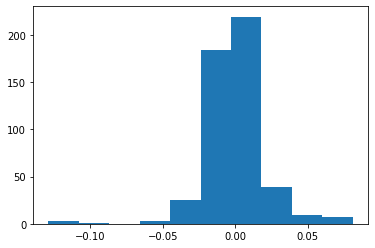

In [24]:
plt.hist(rets)
plt.show()

In [25]:
skew = rets.skew()
kurt = rets.kurtosis()
print(f"Skew: {skew}\nKurtosis: {kurt}")

Skew: -0.8044421761299194
Kurtosis: 9.186582798201156


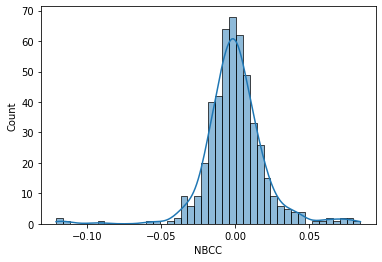

In [26]:
sns.histplot(pf_perc_rets, x='NBCC', kde=True)
plt.show()

## Alternative measures of risk

### Sortino ratio
focus on downside returns

In [27]:
rfr = 0.04
tgt_ret = 0.04
# select the return lower than tgt_ret
neg_rets = rets[rets < tgt_ret]
exp_rets = rets.mean()
down_std = neg_rets.std()
sortino_r = (exp_rets - rfr) / down_std
print(sortino_r)

-2.236625515611225


### maximum draw-down
* The largest percentage loss from a market peak to trough
* Dependent on the chosen time window.
* the recovery time: time it takes to get back to break-even

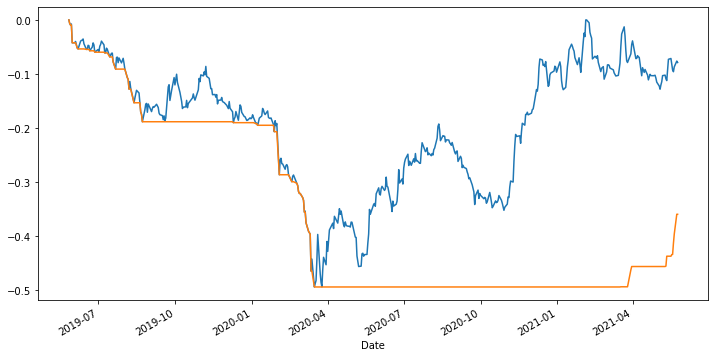

In [28]:
roll_max = pf['NBCC'].rolling(min_periods=1, window=250).max()
daily_drawdown = pf['NBCC'] / roll_max - 1.0
max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=250).min()

# plot
plt.figure(figsize=(12, 6))
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()

## Comparing against a benchmark

In [39]:
# active  return in python
# cols = mean_rets, variance, pf_weights, bm_weights
wt_pf_rets = pf_perc_rets.iloc[1:, :-1] * weights
nifty = wt_pf_rets.iloc[1:, -1]

In [35]:
total_rets_pf = .mean().sum()
total_rets_pf

0.0006760887728730651

In [ ]:
nifty _total = 